# K-nearest neighbors(KNN)

KNN算法的核心思想是基于“物以类聚，人以群分”的原则，即相似的数据点往往具有相似的特征和类别。通过计算数据点之间的距离（如欧氏距离、曼哈顿距离等），KNN算法可以找到最近的邻居，并根据这些邻居的类别或值来进行分类或回归。

最能体现KNN思想的问题，莫过于$推荐系统$。

在电影推荐系统中，对于一个用户A，我们把和他性格特征高度重合的k个用户看过的电影推荐给他，这就是KNN的基本思想。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X = iris.data[:,:2]
y = iris.target

In [4]:
k_list = [1,3,5,8,10,15]
h = 0.2

In [5]:
# 创建不同颜色的画布
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

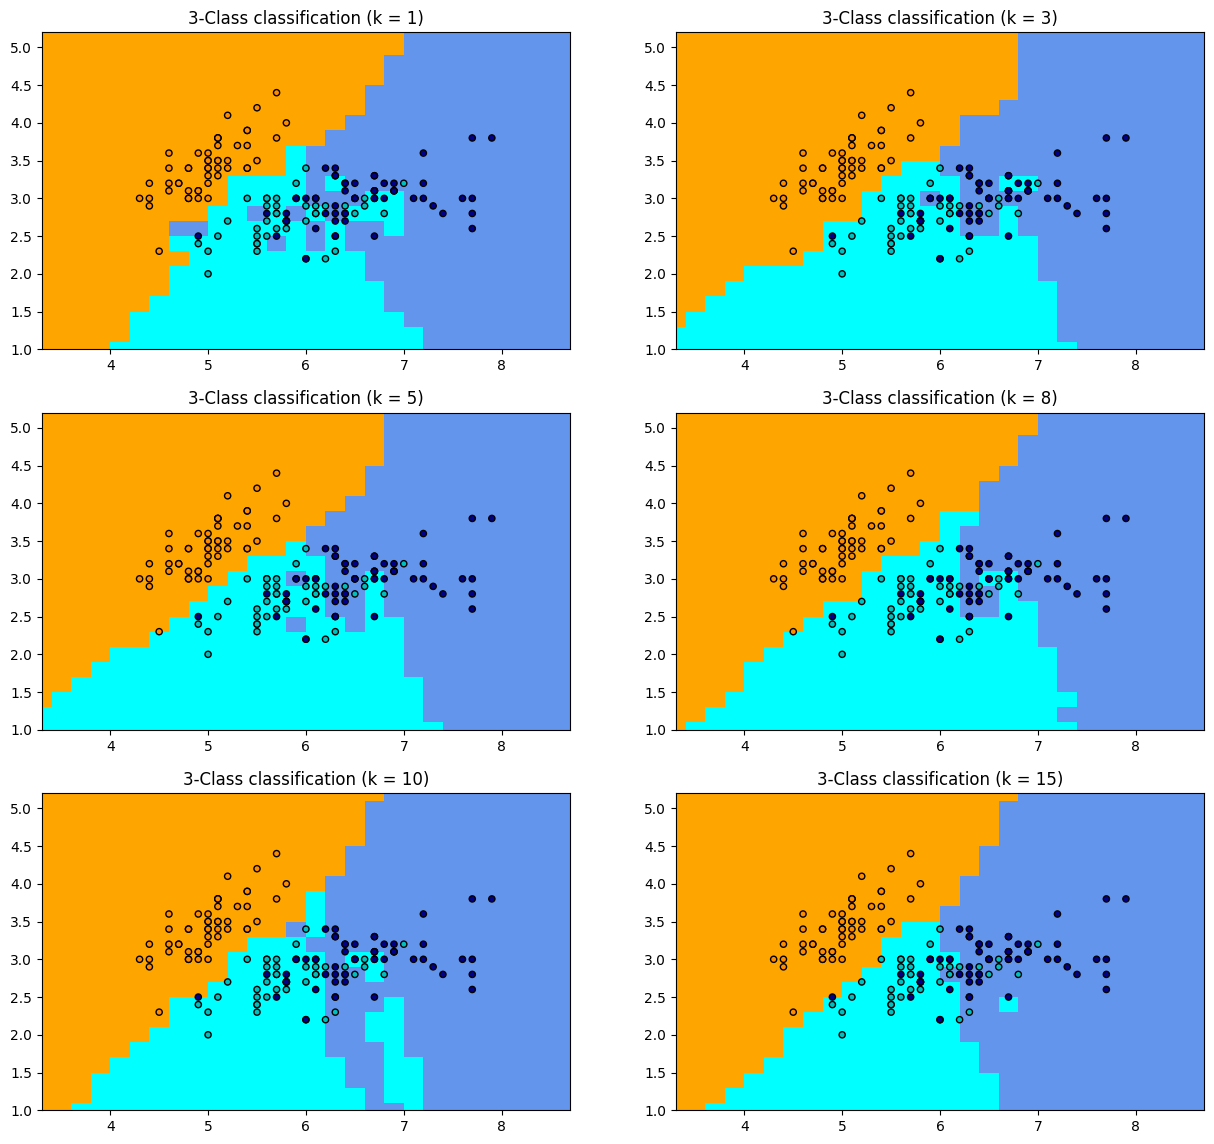

In [6]:
plt.figure(figsize=(15,14))
# 根据不同的k值进行可视化
for ind,k in enumerate(k_list):
    # 训练模型
    clf = KNeighborsClassifier(k)
    clf.fit(X, y)
    # 画出决策边界
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # 根据边界填充颜色
    Z = Z.reshape(xx.shape)

    plt.subplot(321+ind)  
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # 数据点可视化到画布
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i)"% k)

plt.show()

如果选择较小的K值，就相当于用较小的领域中的训练实例进行预测，例如当k=1的时候，在分界点位置的数据很容易受到局部的影响，图中蓝色的部分中还有部分绿色块，主要是数据太局部敏感。当k=15的时候，不同的数据基本根据颜色分开，当时进行预测的时候，会直接落到对应的区域，模型相对更加鲁棒。